# Dimensionality Reduction and Clustering on MNIST
### Omri Allouche, Bar Ilan University's Applied Data Science Course, 2019

In this exercise, we will work with methods for dimensionality reduction, clustering and machine learning for classification.  
We will start with the MNIST dataset, that includes images of 28x28 pixels of different digits, along with their true labels. Although the dataset is labeled, we will also use it to play with methods of unsupevised and semi-supervised learning.

First, let's import relevant packages and load the MNIST dataset.

In [ ]:
# Import relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["font.size"] = 14
plt.rcParams["axes.titlesize"] = 28
plt.rcParams["axes.labelsize"] = 24
plt.rcParams["figure.figsize"] = (20,12)

np.random.seed(0)

In [ ]:
from sklearn.datasets import fetch_openml  #sklearn version 0.24
mnist = fetch_openml('mnist_784')


In [ ]:
dim = int(np.sqrt(len(mnist.data.columns))) # 28
X = mnist.data.values # data is pd.DataFrame
y = mnist.target.cat.codes.values # mnist.target is pd.Categorical


In [ ]:
print(X.shape)
print(y.shape)
print(dim)

(70000, 784)
(70000,)
28


Use seaborn to plot the number of observations of each class.

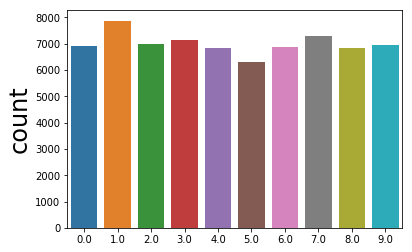

In [ ]:
sns.countplot(y)

To speed things up, let's use a subset of the data, with 5,000 random points.

In [ ]:
rand_subset = np.random.choice(list(range(X.shape[0])), 5000)
X_subset = X[rand_subset, :]
y_subset = y[rand_subset]

Now, let's split the data into train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.20, random_state=0)

### Dimensionality Reduction using PCA
Reduce dimensions using PCA to 2D.


First, let's use PCA to reduce the dimensions to 50. Plot the percent of explained variance as a function of the number of eigenvectors in PCA.

Text(0,0.5,'Explained Variance')

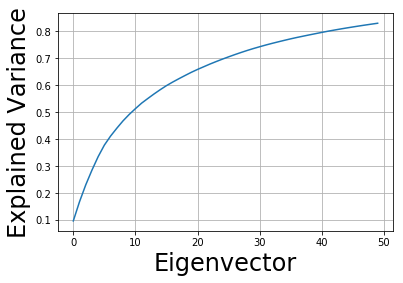

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_train)

plt.plot(range(50), np.cumsum(pca.explained_variance_ratio_))
plt.grid('on')
plt.xlabel('Eigenvector')
plt.ylabel('Explained Variance')

Plot the transformed coordinates of the two largest eigenvectors (i.e. the results of using PCA to reduce dimensions to 2D), with the color of each point representing its digit.

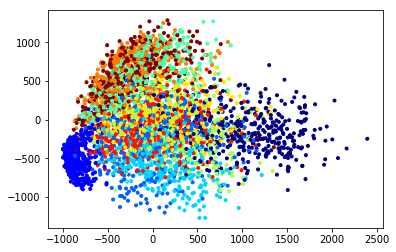

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=y_train, marker=".", cmap="jet")

Briefly discuss the results.

### Dimensionality Reduction using PCA + tSNE
Next, use PCA to reduce dimensions to 50D, and then use tSNE to further reduce dimensions to 2D. Briefly discuss the results.

In [ ]:
from sklearn.manifold import TSNE

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_train)
tsne = TSNE(n_components=2, n_iter=250)
X_2D = tsne.fit_transform(X_pca)

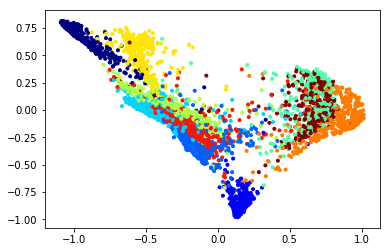

In [ ]:
plt.scatter(X_2D[:, 0], X_2D[:, 1],
            c=y_train, marker=".", cmap="jet")

tSNE is notorious for producing very different results in different runs. You can read more about it here - XXXXXX.  
Play with the tSNE parameters and show a few images that demonstrate its robustness or sensitivity to the used parameters.

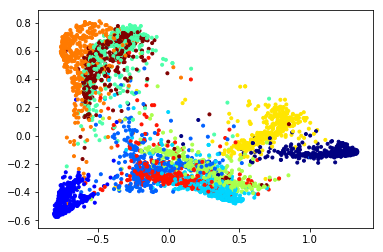

In [ ]:
# Another run, with the same parameters:
tsne = TSNE(n_components=2, n_iter=250)
X_2D = tsne.fit_transform(X_pca)
plt.scatter(X_2D[:, 0], X_2D[:, 1],
            c=y_train, marker=".", cmap="jet")

In [ ]:
# lower perplexity

In [ ]:
# Higher perplexity

Plot the Shepard Diagram, giving the distance between points in the original 784D space, in the 50D space after PCA, and in the 2D tSNE space.  

Note that we're going to compute the distance between all pairs of points, so we'll get N^2 points in the Shepard diagram. We can choose a small subset of the points (say, 100 points) and get a good statistical understanding of the behavior.

In [ ]:
# First compute the distance between points in the 2D space. We will sample a subset of the points, as we do not need to use all.
random_points = np.random.randint(0, y_train.shape[0], 100)

from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances
distance_2D = dist(X_2D[random_points,:])
distance_50D = dista(X_pca[random_points,:])
distance_original_dimensions = dist(X_train[random_points,:])

In [ ]:
def plot_sheppard_diagram(x, y):
    plt.plot(x.ravel(), y.ravel(), '.')
    max_val = np.max(list(x.ravel()) + list(y.ravel()))
    plt.plot([0, max_val], [0, max_val], '-r')
    plt.ylim((np.min(y.ravel()), np.max(y.ravel())))

Text(0,0.5,'Distances in 50D')

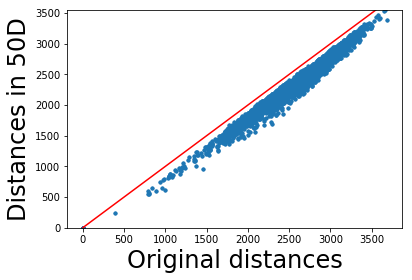

In [ ]:
plot_sheppard_diagram(x=distance_original_dimensions, y=distance_50D)
plt.xlabel('Original distances')
plt.ylabel('Distances in 50D')

Text(0,0.5,'Distances in 2D')

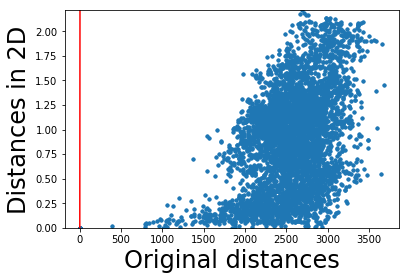

In [ ]:
plot_sheppard_diagram(x=distance_original_dimensions, y=distance_2D)
plt.xlabel('Original distances')
plt.ylabel('Distances in 2D')

### Dimensionality Reduction using UMAP

First, let's install the UMAP package. Use 
`!conda install -c conda-forge umap-learn`
or 
`!pip install umap-learn`

Use UMAP to reduce the dimensions. First, reduce dimensions to 50D using PCA and then apply UMAP.

In [ ]:
import umap
umap_obj = umap.UMAP(random_state=0)

c:\programdata\anaconda3\lib\site-packages\umap\umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "..\..\programdata\anaconda3\lib\site-packages\umap\umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
c:\programdata\anaconda3\lib\site-packages\numba\compiler.py:725: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "..\..\programdata\anaconda3\lib\site-packages\umap\umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
c:\programdata\anaconda3\lib\site-packages\numba\compiler.py:734: NumbaDeprecationWarning: 
Fall-back from the nopython compilation pa

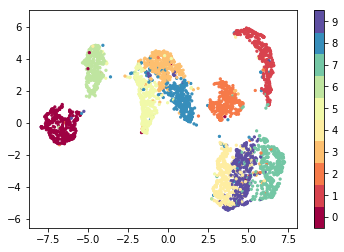

In [ ]:
umap_embedding = umap_obj.fit_transform(X_pca)
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=y_train, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

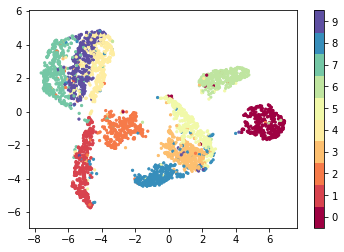

In [ ]:
umap_embedding = umap_obj.fit_transform(X_train)
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=y_train, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

### Clustering
Run k-means clustering with k=10 on the 2D space after using PCA to reduce to 50 dimensions and UMAP to 2D.  
Show the contingency table between the identified clusters and the true labels.

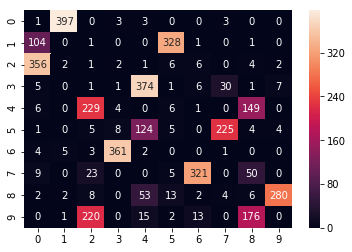

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
clusters = KMeans(n_clusters=10, random_state=0).fit_predict(umap_embedding)

sns.heatmap(contingency_matrix(y_train, clusters), annot=True, fmt='g')

#### External Methods for Evaluating Clustering Performance


Compute the Rand score and the adjusted Rand score, using sklearn.metrics. 

In [ ]:
from sklearn import metrics
print('Adjusted rand index: ', metrics.adjusted_rand_score(labels_true=y_train, labels_pred=clusters))

Adjusted rand index:  0.6191640994038334


Compute the homogeneity and completeness scores, using sklearn.metrics

In [ ]:
metrics.homogeneity_completeness_v_measure(labels_true=y_train, labels_pred=clusters)

(0.7149364241070395, 0.722214517413264, 0.7185570417139592)

Compute the Mutual Information between the true and predicted clusters.

In [ ]:
print('Adjusted Mutual Information score: ', metrics.adjusted_mutual_info_score(labels_true=y_train, labels_pred=clusters))

Adjusted Mutual Information score:  0.7136696022241642


#### Internal Methods for Evaluating Clustering Performance
Compute the Silhouette score for k=4, k=7, k=10.  
Plot the Silhoutte samples graph (as we've seen in class, see https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [ ]:
metrics.silhouette_score(X_train, clusters, metric='euclidean')

0.04606858173298634

### Classification using lower dimensions
Next, let's train a Logistic Regression classifier on the original data and on data of reduced dimensions.  

Let's start with a classifier on the original MNIST dimensions.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

print(metrics.classification_report(y_train, model.predict(X_train)))

print(metrics.classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       407
        1.0       1.00      1.00      1.00       435
        2.0       1.00      1.00      1.00       380
        3.0       1.00      1.00      1.00       426
        4.0       1.00      1.00      1.00       395
        5.0       1.00      1.00      1.00       376
        6.0       1.00      1.00      1.00       376
        7.0       1.00      1.00      1.00       408
        8.0       1.00      1.00      1.00       370
        9.0       1.00      1.00      1.00       427

avg / total       1.00      1.00      1.00      4000

             precision    recall  f1-score   support

        0.0       0.91      0.87      0.89        99
        1.0       0.95      0.98      0.97       113
        2.0       0.83      0.81      0.82       111
        3.0       0.85      0.78      0.82       102
        4.0       0.92      0.91      0.92        92
        5.0       0.74      0.79      0.77

Now build a classifier on the projection made by PCA to 50 dimensions.

In [ ]:
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_pca, y_train)

print(metrics.classification_report(y_train, model.predict(X_pca)))

print(metrics.classification_report(y_test, model.predict(pca.transform(X_test))))

             precision    recall  f1-score   support

        0.0       0.95      0.98      0.96       407
        1.0       0.93      0.97      0.95       435
        2.0       0.92      0.90      0.91       380
        3.0       0.92      0.90      0.91       426
        4.0       0.92      0.93      0.92       395
        5.0       0.87      0.85      0.86       376
        6.0       0.92      0.94      0.93       376
        7.0       0.93      0.94      0.94       408
        8.0       0.87      0.80      0.83       370
        9.0       0.89      0.90      0.90       427

avg / total       0.91      0.91      0.91      4000

             precision    recall  f1-score   support

        0.0       0.88      0.93      0.91        99
        1.0       0.92      0.97      0.94       113
        2.0       0.88      0.80      0.84       111
        3.0       0.88      0.87      0.88       102
        4.0       0.86      0.91      0.88        92
        5.0       0.78      0.76      0.77

Next build a classifier on the projection made by using UMAP to reduce the dimensions of the original data to 50 dimensions.

In [ ]:
%%time
umap_obj = umap.UMAP(random_state=0, n_components=50)

umap_embedding = umap_obj.fit_transform(X_train)
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(umap_embedding, y_train)

print(metrics.classification_report(y_train, model.predict(umap_embedding)))

print(metrics.classification_report(y_test, model.predict(umap_obj.transform(X_test))))

             precision    recall  f1-score   support

        0.0       0.98      0.97      0.97       407
        1.0       0.88      0.99      0.93       435
        2.0       0.96      0.92      0.94       380
        3.0       0.90      0.93      0.91       426
        4.0       0.94      0.85      0.89       395
        5.0       0.91      0.89      0.90       376
        6.0       0.95      0.96      0.96       376
        7.0       0.91      0.90      0.91       408
        8.0       0.95      0.83      0.88       370
        9.0       0.82      0.90      0.86       427

avg / total       0.92      0.92      0.92      4000

             precision    recall  f1-score   support

        0.0       0.93      0.99      0.96        99
        1.0       0.84      1.00      0.91       113
        2.0       0.98      0.85      0.91       111
        3.0       0.92      0.88      0.90       102
        4.0       0.96      0.86      0.91        92
        5.0       0.85      0.87      0.86

Finally, let's build a classifier on the projection made by using UMAP to reduce the dimensions of the original data to **2** dimensions.

In [ ]:
umap_obj = umap.UMAP(random_state=0, n_components=2)

umap_embedding = umap_obj.fit_transform(X_train)
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(umap_embedding, y_train)

print(metrics.classification_report(y_train, model.predict(umap_embedding)))

print(metrics.classification_report(y_test, model.predict(umap_obj.transform(X_test))))

             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98       407
        1.0       0.89      0.92      0.91       435
        2.0       0.87      0.93      0.90       380
        3.0       0.78      0.90      0.84       426
        4.0       0.74      0.68      0.71       395
        5.0       0.89      0.80      0.84       376
        6.0       0.95      0.96      0.96       376
        7.0       0.85      0.89      0.87       408
        8.0       0.97      0.78      0.87       370
        9.0       0.67      0.69      0.68       427

avg / total       0.86      0.85      0.85      4000

             precision    recall  f1-score   support

        0.0       0.93      1.00      0.96        99
        1.0       0.85      0.94      0.89       113
        2.0       0.91      0.86      0.88       111
        3.0       0.84      0.90      0.87       102
        4.0       0.75      0.72      0.73        92
        5.0       0.87      0.82      0.84

### Using UMAP for classification

UMAP has a special mode of operation, that learns the transformation **given the true labels**.  
To run it, add the true labels to the fit function. You can read more about it in the [UMAP documentation](https://umap-learn.readthedocs.io/en/latest/supervised.html). 

Below, fit a Logistic Regression classifier to a UMAP embedding of 50 dimensions. 

In [ ]:
%%time
umap_obj = umap.UMAP(random_state=0, n_components=50)

umap_embedding = umap_obj.fit_transform(X_train, y=y_train)
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(umap_embedding, y_train)

print(metrics.classification_report(y_train, model.predict(umap_embedding)))

print(metrics.classification_report(y_test, model.predict(umap_obj.transform(X_test))))

c:\programdata\anaconda3\lib\site-packages\umap\umap_.py:569: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "categorical_simplicial_set_intersection" failed type inference due to: non-precise type pyobject
[1] During: typing of argument at c:\programdata\anaconda3\lib\site-packages\umap\umap_.py (599)

File "..\..\programdata\anaconda3\lib\site-packages\umap\umap_.py", line 599:
def categorical_simplicial_set_intersection(
    <source elided>
    """
    simplicial_set = simplicial_set.tocoo()
    ^

  @numba.jit()
c:\programdata\anaconda3\lib\site-packages\numba\compiler.py:725: NumbaWarning: Function "categorical_simplicial_set_intersection" was compiled in object mode without forceobj=True.

File "..\..\programdata\anaconda3\lib\site-packages\umap\umap_.py", line 570:
@numba.jit()
def categorical_simplicial_set_intersection(
^

  self.func_ir.loc))
c:\programdata\anaconda3\lib\site-packages\numba\compiler.py:734: NumbaDeprecation

             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       407
        1.0       0.99      1.00      1.00       435
        2.0       1.00      1.00      1.00       380
        3.0       0.99      0.99      0.99       426
        4.0       1.00      1.00      1.00       395
        5.0       1.00      1.00      1.00       376
        6.0       0.99      1.00      1.00       376
        7.0       0.99      1.00      1.00       408
        8.0       0.99      0.98      0.99       370
        9.0       0.99      0.99      0.99       427

avg / total       1.00      0.99      0.99      4000

             precision    recall  f1-score   support

        0.0       0.95      1.00      0.98        99
        1.0       0.85      1.00      0.92       113
        2.0       0.99      0.86      0.92       111
        3.0       0.92      0.92      0.92       102
        4.0       0.98      0.89      0.93        92
        5.0       0.89      0.89      0.89

### Bonus: Semi-supervised Learning
Now, let's assume we only have labels for a small set of the images, but have the entire dataset available.  

Next we will use the entire unlabeled dataset to reduce dimensions and use the reduced dimensions as features to a classifier that uses a labeled set. We will plot the learning curve of such a classifier, varying the number of labeled dataset for training.

First, evaluate the performance of a simple Logistic Regression classifier on the dataset, with increasing sizes of labeled datapoints used for training the model. Use the following sizes for the learning curve:

In [ ]:
num_available_labeled_points = [20,50,100,120,150,200] + list(range(250,500,50)) + list(range(500,1000,100))
num_available_labeled_points

[20, 50, 100, 120, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900]